<a href="https://colab.research.google.com/github/tio14/Home-Kredit-Internship/blob/main/Logistic_Regression_On_Payment_Difficulties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_path = 'gdrive/MyDrive/Rakamin Academy/Final Project/application_train.csv'
df = pd.read_csv(data_path)

Data Cleaning

In [ ]:
df.shape

(307511, 122)

In [ ]:
columns = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
           'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
           'REGION_POPULATION_RELATIVE']
skipped_columns = ['SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
           'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
           'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
           'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE']
data = df[columns]
data.shape

(307511, 16)

In [ ]:
data = data.dropna()
data.shape

(306207, 16)

In [ ]:
data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313


Data Explaratory

In [ ]:
data['TARGET'].value_counts()
# imbalance data

0    281452
1     24755
Name: TARGET, dtype: int64

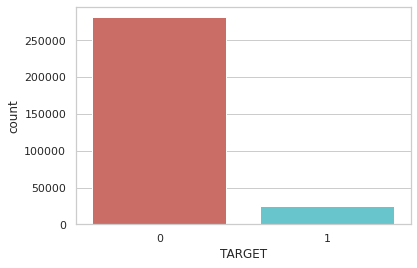

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x='TARGET', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
data.groupby('TARGET').mean()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE
TARGET,,,,,,
0,0.412898,169058.662319,602411.657601,27177.183815,542278.318269,0.021018
1,0.463947,165642.787901,557717.015169,26496.035084,488708.949465,0.019128


In [ ]:
data['NAME_FAMILY_STATUS'].value_counts()

Married                 195641
Single / not married     45197
Civil marriage           29659
Separated                19695
Widow                    16015
Name: NAME_FAMILY_STATUS, dtype: int64

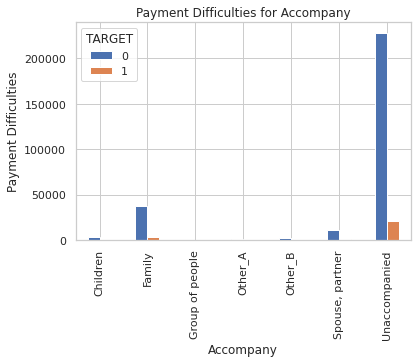

In [ ]:
pd.crosstab(data.NAME_TYPE_SUITE, data.TARGET).plot(kind='bar')
plt.title('Payment Difficulties for Accompany')
plt.xlabel('Accompany')
plt.ylabel('Payment Difficulties')
plt.savefig('Accompany')

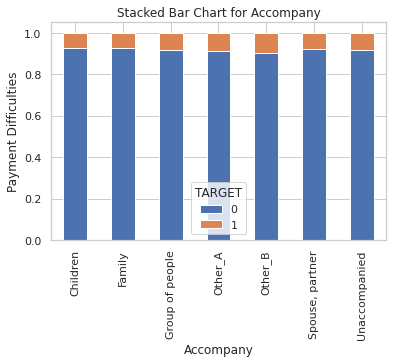

In [ ]:
table = pd.crosstab(data.NAME_TYPE_SUITE, data.TARGET)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Accompany')
plt.xlabel('Accompany')
plt.ylabel('Payment Difficulties')
plt.savefig('Accompany with Stacked Bar')

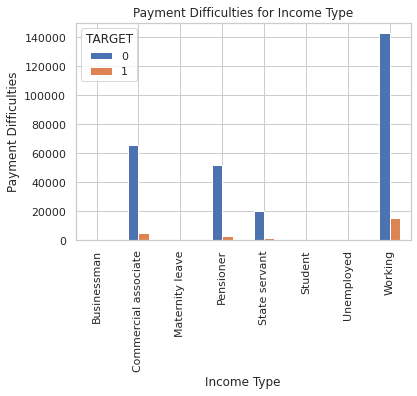

In [ ]:
pd.crosstab(data.NAME_INCOME_TYPE, data.TARGET).plot(kind='bar')
plt.title('Payment Difficulties for Income Type')
plt.xlabel('Income Type')
plt.ylabel('Payment Difficulties')
plt.savefig('Income Type')

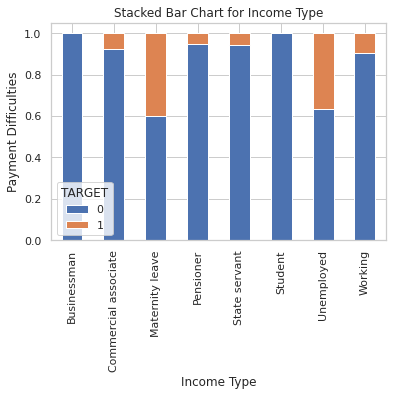

In [ ]:
table = pd.crosstab(data.NAME_INCOME_TYPE, data.TARGET)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Income Type')
plt.xlabel('Income Type')
plt.ylabel('Payment Difficulties')
plt.savefig('Income Type with Stacked Bar')

In [ ]:
data['NAME_INCOME_TYPE'].unique()
#plt.pie(data.NAME_INCOME_TYPE)

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

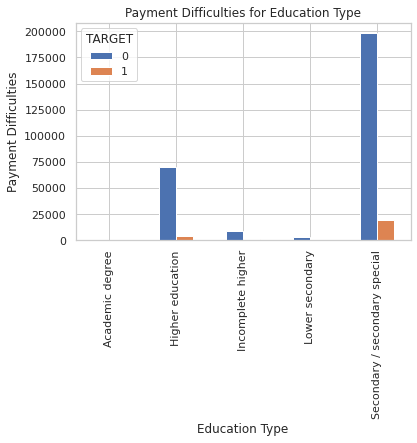

In [ ]:
pd.crosstab(data.NAME_EDUCATION_TYPE, data.TARGET).plot(kind='bar')
plt.title('Payment Difficulties for Education Type')
plt.xlabel('Education Type')
plt.ylabel('Payment Difficulties')
plt.savefig('Education Type')

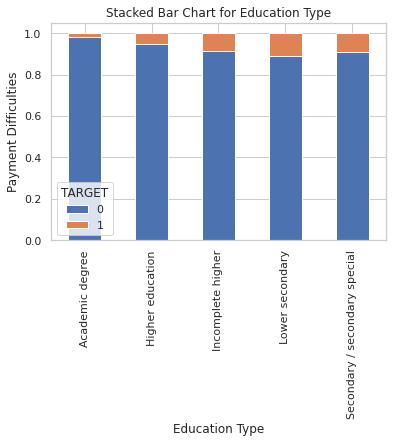

In [ ]:
table = pd.crosstab(data.NAME_EDUCATION_TYPE, data.TARGET)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Education Type')
plt.xlabel('Education Type')
plt.ylabel('Payment Difficulties')
plt.savefig('Education Type with Stacked Bar')

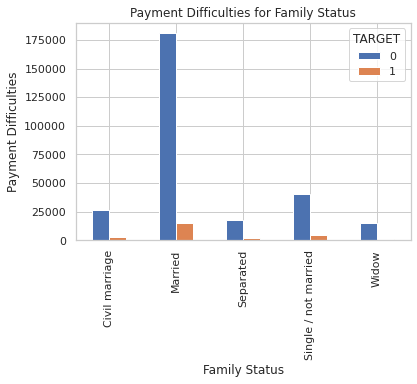

In [ ]:
pd.crosstab(data.NAME_FAMILY_STATUS, data.TARGET).plot(kind='bar')
plt.title('Payment Difficulties for Family Status')
plt.xlabel('Family Status')
plt.ylabel('Payment Difficulties')
plt.savefig('Family Status')

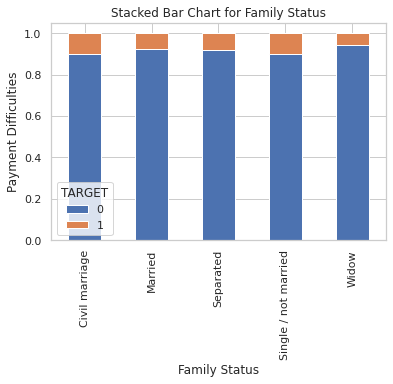

In [ ]:
table = pd.crosstab(data.NAME_FAMILY_STATUS, data.TARGET)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Family Status')
plt.xlabel('Family Status')
plt.ylabel('Payment Difficulties')
plt.savefig('Family Status with Stacked Bar')

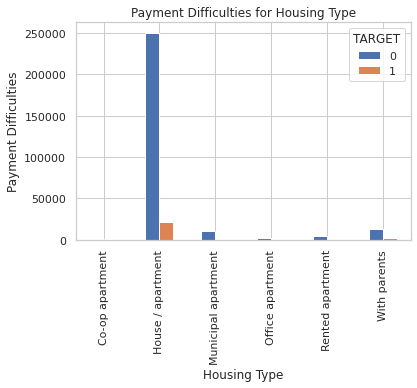

In [ ]:
pd.crosstab(data.NAME_HOUSING_TYPE, data.TARGET).plot(kind='bar')
plt.title('Payment Difficulties for Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Payment Difficulties')
plt.savefig('Housing Type')

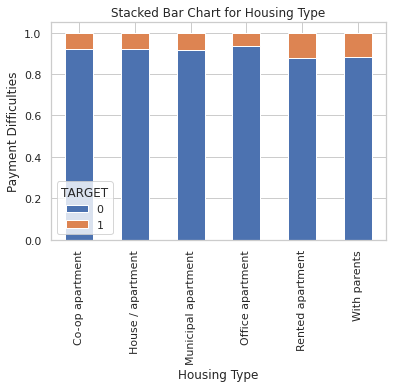

In [ ]:
table = pd.crosstab(data.NAME_HOUSING_TYPE, data.TARGET)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Payment Difficulties')
plt.savefig('Housing Type with Stacked Bar')

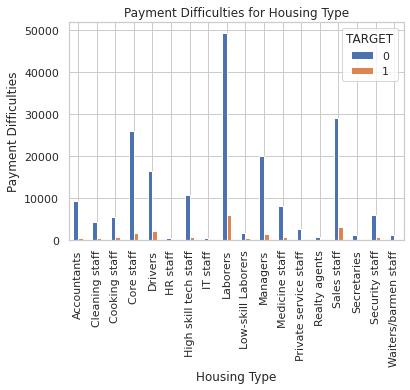

In [ ]:
pd.crosstab(df.OCCUPATION_TYPE, df.TARGET).plot(kind='bar')
plt.title('Payment Difficulties for Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Payment Difficulties')
plt.savefig('Housing Type')

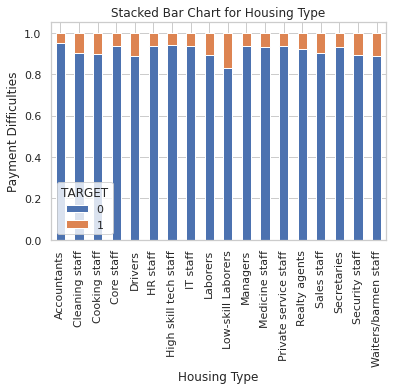

In [ ]:
table = pd.crosstab(df.OCCUPATION_TYPE, df.TARGET)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Payment Difficulties')
plt.savefig('Housing Type with Stacked Bar')

Create dummy variables

In [ ]:
cat_vars = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
            'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_CONTRACT_TYPE',
            'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
for var in cat_vars:
  cat_list = 'var'+'_'+var
  cat_list = pd.get_dummies(data[var], prefix=var)
  data1 = data.join(cat_list)
  data = data1

cat_vars = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
            'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_CONTRACT_TYPE',
            'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [ ]:
data_final = data[to_keep]
data_final.columns.values

array(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'NAME_TYPE_SUITE_Children', 'NAME_TYPE_SUITE_Family',
       'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A',
       'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Spouse, partner',
       'NAME_TYPE_SUITE_Unaccompanied', 'NAME_INCOME_TYPE_Businessman',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_F

Over-sampling using SMOTE

In [ ]:
x = data_final.loc[:, data_final.columns != 'TARGET']
y = data_final.loc[:, data_final.columns == 'TARGET']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) 
columns = x_train.columns

os_data_x, os_data_y = os.fit_resample(x_train, y_train)
os_data_x = pd.DataFrame(data=os_data_x, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['TARGET'])
# checking
print('Length of oversampled data is ', len(os_data_x))
print('Number of Having Payment Difficulties in oversampled data ', len(os_data_y[os_data_y['TARGET']==1]))
print('Number of Not Having Payment Difficulties in oversampled data ', len(os_data_y[os_data_y['TARGET']==0]))

Length of oversampled data is  394032
Number of Having Payment Difficulties in oversampled data  197016
Number of Not Having Payment Difficulties in oversampled data  197016


Recursive Feature Elimination

In [ ]:
data_final_vars = data_final.columns.values.tolist()
y = ['TARGET']
x = [i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg)
rfe = rfe.fit(os_data_x, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False False  True False False False False
  True False  True False  True  True False False  True False  True False
 False False  True  True  True  True False False  True False False False
 False False False  True  True False  True  True  True  True]
[ 1  1  1  1  1 17 12  1 18 16 14  7  1 22  1 24  1  1 20 23  1 19  1  9
 11  4  1  1  1  1  2 15  1  8 13 10  6  3  5  1  1 21  1  1  1  1]


In [ ]:
temp = []
for x in os_data_x:
  temp.append(x)
temp

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'NAME_TYPE_SUITE_Children',
 'NAME_TYPE_SUITE_Family',
 'NAME_TYPE_SUITE_Group of people',
 'NAME_TYPE_SUITE_Other_A',
 'NAME_TYPE_SUITE_Other_B',
 'NAME_TYPE_SUITE_Spouse, partner',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Unemployed',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Widow',
 '

In [ ]:
"""
cols = [#'CNT_CHILDREN',
#'AMT_INCOME_TOTAL',
#'AMT_CREDIT',
#'AMT_ANNUITY',
#'AMT_GOODS_PRICE',

#'NAME_TYPE_SUITE_Family',

#'NAME_TYPE_SUITE_Unaccompanied',
'NAME_INCOME_TYPE_Commercial associate',

'NAME_INCOME_TYPE_Pensioner',
'NAME_INCOME_TYPE_State servant',

'NAME_INCOME_TYPE_Working',
'NAME_EDUCATION_TYPE_Higher education',

#'NAME_FAMILY_STATUS_Civil marriage',
#'NAME_FAMILY_STATUS_Married',
#'NAME_FAMILY_STATUS_Separated',
#'NAME_FAMILY_STATUS_Single / not married',

#'NAME_HOUSING_TYPE_House / apartment',

#'CODE_GENDER_F',

#'CODE_GENDER_M',
#'FLAG_OWN_CAR_N',
#'FLAG_OWN_CAR_Y',
#'FLAG_OWN_REALTY_N',

#'FLAG_OWN_REALTY_Y'
]

"""
cols = [
 #'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 #'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 #'NAME_INCOME_TYPE_Student',
 #'NAME_INCOME_TYPE_Unemployed',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 ]

 
x = os_data_x[cols]
y = os_data_y['TARGET']

Implementing The Model

In [ ]:
import statsmodels.api as sm
logit_model = sm.Logit(y, x)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.583320
         Iterations 9
                                          Results: Logit
Model:                         Logit                       Pseudo R-squared:            0.158      
Dependent Variable:            TARGET                      AIC:                         459711.4315
Date:                          2022-11-02 10:13            BIC:                         459809.3891
No. Observations:              394032                      Log-Likelihood:              -2.2985e+05
Df Model:                      8                           LL-Null:                     -2.7312e+05
Df Residuals:                  394023                      LLR p-value:                 0.0000     
Converged:                     1.0000                      Scale:                       1.0000     
No. Iterations:                9.0000                                                              
-----------------------------------------

Logistic Regression Model Fitting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(x_test)
print('Accuracy on test set : ', logreg.score(x_test, y_test))

Accuracy on test set :  0.8028423991202098


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[59423     8]
 [23298 35481]]


Precision, Recall, F-Measure, and Support

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84     59431
           1       1.00      0.60      0.75     58779

    accuracy                           0.80    118210
   macro avg       0.86      0.80      0.79    118210
weighted avg       0.86      0.80      0.79    118210



ROC Curve

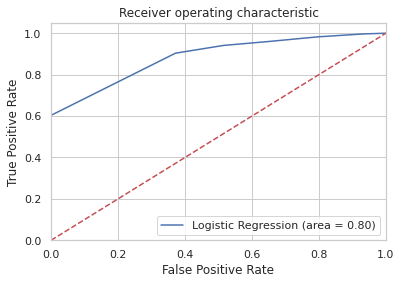

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()